In [1]:
%load_ext autoreload
%autoreload 2
import brian2.numpy_ as np
import brian2.only as bb
from brian2 import ms, second, Hz, mV, pA, nS, pF
from matplotlib import pyplot as plt
from tqdm import tqdm
import assemblyseq.assemblyseq as asq

from assemblyseq import plotter
import assemblyseq.calc_spikes as cs


faster_run = True

if faster_run:
    bb.set_device('cpp_standalone', directory='PETH_standalone', build_on_run=False)

In [2]:
config = {'Ne': 20000, 'Ni': 5000, 'cp_ee': .01, 'cp_ie': .01, 'cp_ei': 0.01, 'cp_ii': .01,
              'n_ass': 10, 's_ass': 500, 'pr': .15, 'pf': .03, 'symmetric_sequence': True, 'p_rev': .03,
              'g_ee': 0.1 * nS, 'g_ie': 0.1 * nS, 'g_ei': 0.4 * nS, 'g_ii': 0.4 * nS}

In [3]:
bb.start_scope()
if faster_run:
    bb.get_device().reinit()
    bb.get_device().activate(build_on_run=False, directory='PETH_standalone')

nn = asq.Nets(config)

initiated  Mon May 18 15:56:44 2020


In [4]:
nn.generate_ps_assemblies('gen_no_overlap')
nn.set_net_connectivity()

nn.set_spike_monitor()
nn.set_rate_monitor()

for gr_num in tqdm(range(nn.n_ass)):
    gr = nn.p_ass_index[0][gr_num]
    t_inp = (20.55 + gr_num * .1) * second
    nn.set_noisy_input(gr, t_inp, sigma=0 * ms)

nn.set_syn_input(nn.p_ass_index[0][0], np.arange(46, 51,1))
nn.balance(10 * second, 5.)
nn.balance(10 * second, 5.)
nn.balance(20 * second, .1)
nn.balance(5 * second, .01)
nn.run_sim(22*second)
# nn.Pe.I -= .0 * pA

A random sequence without overlaps is created


100%|██████████| 10/10 [00:00<00:00, 82.14it/s]

connections imprinted!  Mon May 18 15:56:55 2020


balanced:  0.6334078311920166
balanced:  0.22982501983642578
balanced:  0.23233795166015625
balanced:  0.22005295753479004
run:  0.24009299278259277


In [5]:
nn.get_parameters()

{'Ne': 20000,
 'Ni': 5000,
 'cp_ee': 0.01,
 'cp_ie': 0.01,
 'cp_ei': 0.01,
 'cp_ii': 0.01,
 'pr': 0.15,
 'pf': 0.03,
 'g_ee': 100. * psiemens,
 'g_ie': 100. * psiemens,
 'g_ei': 0.4 * nsiemens,
 'g_ii': 0.4 * nsiemens,
 'n_ass': 10,
 's_ass': 500,
 'n_chains': 1,
 'cf_ffn': 1.0,
 'cf_rec': 1.0,
 'type_ext_input': 'curr',
 'ext_input': 200. * pamp,
 'synapses_per_nrn': 250,
 'inject_some_extra_i': False,
 'g_ff_coef': 1,
 'symmetric_sequence': True,
 'p_rev': 0.03,
 'extra_recorded_nrns': False,
 'limit_syn_numbers': False,
 'continuous_ass': False,
 'use_random_conn_ff': False,
 'modified_contin': False}

In [6]:
%%time
if faster_run:
    bb.device.build(directory='PETH_standalone', compile=True, run=True, debug=False)

CPU times: user 398 ms, sys: 231 ms, total: 629 ms
Wall time: 2min 46s


(0, 1000)

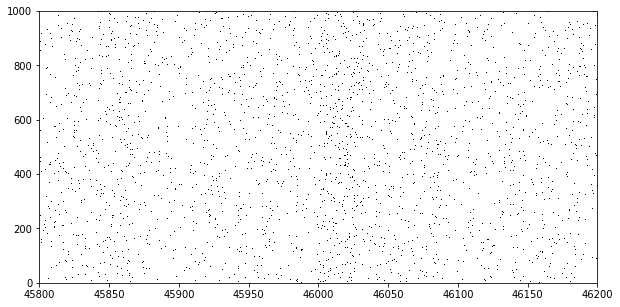

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(nn.mon_spike_e.t/ms, nn.mon_spike_e.i, ',k')
plt.xlim([45800, 46200])
plt.ylim([0, 1000])

<Figure size 720x360 with 0 Axes>

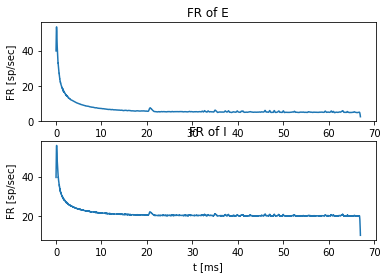

In [8]:
plt.figure(figsize=(10, 5))
plotter.plot_pop_fr(nn)

In [9]:
spikes = cs.get_spike_times_ps(nn, n_ps=0, frac=0.02)

si, st = zip(*spikes)

(45500, 60500)

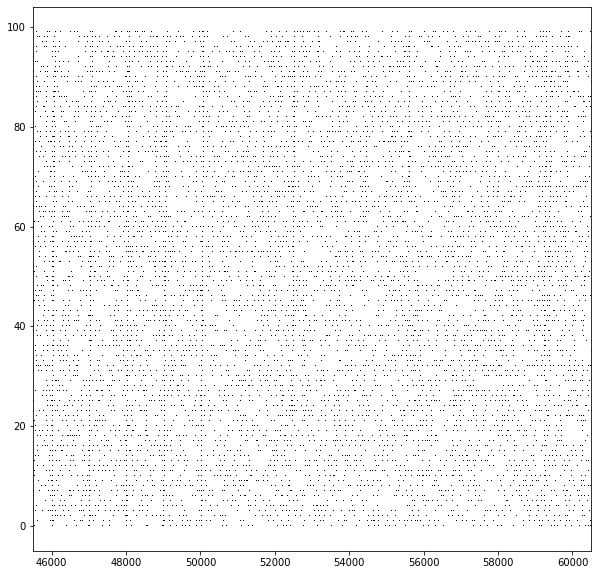

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(st/ms, si, ',k')
plt.xlim([45500, 60500])

In [65]:
set_syn_input(nn, nn.p_ass_index[0][0], 23. * second)

In [59]:
np.array(23.*second)

array(23.)